# **BCI Assignment-1**

## **Group No: 2**

## Title: Arm and Hand movements decoded from persons with spinal cord injury

### Team Members:
```
Anirudh Jakhotia (S20190010007)
Naveen Kumar (S20190010078)
```



## Imports

In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import periodogram, welch
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

data = loadmat("data\S01A.mat")

## Data Loading

In [ ]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jan 22 13:08:11 2015',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[(array([[-12.00062275, -13.33673   , -35.05511475, ...,   0.08380261,
                  -6.07549334,  -5.5213809 ],
                [-13.97922993, -14.34422398, -37.34184647, ...,  -3.26412296,
                  -9.13931179,  -8.58871078],
                [-13.9195919 , -13.93152714, -39.27726746, ...,  -4.64124346,
                  -9.49957848, -10.48714733],
                ...,
                [-27.33681107, -22.48322296, -24.05272484, ..., -19.69608116,
                  -9.67378139,  -7.0909009 ],
                [-29.30747032, -24.21957397, -24.35359383, ..., -20.11141014,
                 -11.93140507,  -6.67404699],
                [-30.57230759, -24.99255562, -23.84765434, ..., -20.92814636,
                 -13.99646473,  -7.06803417]]), array([[2],
                [1],
                [2],
                [2],
          

## Exploratory Data Analysis

In [ ]:
data_py = data["data"]
print(type(data_py))

<class 'numpy.ndarray'>


In [ ]:
X = data_py[0][0][0]
y = data_py[0][0][1]

In [ ]:
print(X.shape, y.shape)

(1099541, 13) (200, 1)


In [ ]:
trials = data_py[0][0][2]

try:
    assert trials.shape == y.shape, "Shapes dont match, possible data error"
except:
    exit

labels = []
for idx, val in enumerate(trials):
    lab = y[idx][0]
    if idx != trials.shape[0]-1 :
        rng1, rng2 = val[0], trials[idx + 1][0]
        # print(rng2, rng1)
        
        for i in range(rng2-rng1):
            labels.append(lab)

    else:
        rng1, rng2 = val[0], X.shape[0]

        for i in range(rng2-rng1):
            labels.append(lab)


In [ ]:
# should be : X.shape[0] - trials[0] : 1099541 - 6659 = 1092882
print(len(labels))
labels = np.array([labels], dtype=int).T

1092882


In [ ]:
# Sanity check
ones_cnt, two_cnt = 0,0 
for i in range(len(labels)):
    if labels[i] == 1 :
        ones_cnt+=1
    elif labels[i] == 2:
        two_cnt+=1

print(ones_cnt, two_cnt)

546327 546555


In [ ]:
# Reshape X accordingly
X = X[trials[0][0] : , :]

In [ ]:
print(X.shape, labels.shape)

(1092882, 13) (1092882, 1)


In [ ]:
headers = ["FC3", "FCz", "FC4", "C5", "C3", "C1", "Cz", "C2", "C4", "C6", "CP3", "CPz", "CP4", "labels"]
data = np.hstack((X, labels))
df = pd.DataFrame(data, columns=headers)
df["labels"].astype('int')

0          2
1          2
2          2
3          2
4          2
          ..
1092877    2
1092878    2
1092879    2
1092880    2
1092881    2
Name: labels, Length: 1092882, dtype: int32

In [ ]:
df.head(10)

,FC3,FCz,FC4,C5,C3,C1,Cz,C2,C4,C6,CP3,CPz,CP4,labels
0,-12.415180,-5.902202,-16.800089,-5.107718,-11.966962,-12.284522,-11.389852,-15.124189,-16.843189,-8.035716,-8.238214,-11.903323,-13.774323,2.0
1,-13.402638,-5.900853,-16.891026,-6.951110,-13.964926,-12.484494,-10.873198,-15.674583,-17.597029,-10.130211,-11.518293,-12.217860,-14.496233,2.0
2,-14.890607,-5.930606,-18.233847,-8.711527,-15.268979,-12.510747,-10.389323,-16.653427,-19.044706,-12.863622,-14.236506,-13.424369,-17.369270,2.0
3,-15.562898,-4.911592,-19.007698,-9.384615,-15.697797,-13.120959,-9.620174,-17.118336,-18.902020,-12.741371,-14.625408,-14.106485,-19.708298,2.0
4,-13.809896,-2.001966,-17.069666,-7.973707,-14.182545,-12.343255,-6.734689,-14.304821,-15.044754,-8.711915,-12.297728,-11.970400,-17.096371,2.0
5,-11.955260,-0.123848,-14.841750,-5.540560,-12.213174,-10.427911,-3.452722,-9.494778,-9.937253,-4.550939,-10.153868,-9.126407,-11.295034,2.0
6,-12.239810,-1.422120,-14.727643,-3.080468,-11.790703,-9.381364,-2.722687,-6.594477,-6.861470,-3.157110,-9.942034,-8.307684,-7.446390,2.0
7,-12.639792,-3.413509,-14.302083,-0.394429,-11.965323,-9.026178,-3.678763,-6.190959,-5.220927,-2.001831,-9.866319,-8.102560,-5.904252,2.0
8,-10.700221,-3.524552,-11.407153,2.121294,-11.212118,-8.265883,-3.935586,-6.172346,-3.626755,1.667900,-8.919575,-6.793031,-4.238944,2.0
9,-7.431019,-2.478637,-8.332531,3.107397,-10.089984,-7.464384,-3.264770,-5.685411,-2.415228,5.190946,-8.318000,-5.296190,-2.514265,2.0


In [ ]:
df.dtypes

FC3       float64
FCz       float64
FC4       float64
C5        float64
C3        float64
C1        float64
Cz        float64
C2        float64
C4        float64
C6        float64
CP3       float64
CPz       float64
CP4       float64
labels    float64
dtype: object

In [ ]:
c3 = df["C3"]

x = 0
for i in c3:
    if (i>=10 and i<=13) or (i>=16 and i<=24) : 
        x+=1

print(x) 

124063


In [ ]:
df.describe()

,FC3,FCz,FC4,C5,C3,C1,Cz,C2,C4,C6,CP3,CPz,CP4,labels
count,1.092882e+06,1.092882e+06,1.092882e+06,1.092882e+06,1.092882e+06,1.092882e+06,1.092882e+06,1.092882e+06,1.092882e+06,1.092882e+06,1.092882e+06,1.092882e+06,1.092882e+06,1.092882e+06
mean,-8.938242e-03,-7.912376e-03,-9.748237e-03,-3.580028e-03,-6.363191e-03,-7.479324e-03,-8.135542e-03,-6.930085e-03,-8.061011e-03,-6.450970e-03,-5.608598e-03,-6.735772e-03,-6.687771e-03,1.500104e+00
std,1.562087e+01,9.257819e+01,1.739989e+01,2.628667e+01,1.320830e+01,1.380260e+01,4.517380e+01,3.159231e+01,1.421051e+01,1.443089e+01,1.206595e+01,1.289818e+01,1.287103e+01,5.000002e-01
min,-1.144346e+02,-3.408318e+04,-1.372871e+02,-8.227690e+03,-7.509589e+01,-8.275147e+01,-1.546460e+04,-9.925697e+03,-9.887794e+01,-1.049832e+02,-1.051785e+02,-7.996628e+01,-9.182040e+01,1.000000e+00
25%,-8.332230e+00,-9.618001e+00,-8.866422e+00,-6.853289e+00,-7.865248e+00,-8.344077e+00,-8.764646e+00,-8.684953e+00,-8.362985e+00,-8.412346e+00,-7.402951e+00,-8.100207e+00,-7.901261e+00,1.000000e+00
50%,-1.929648e-02,-1.290782e-01,1.341389e-03,-2.407380e-01,4.008403e-02,-8.954284e-02,-1.203187e-01,-6.772555e-02,3.887370e-02,-7.280606e-03,-1.245071e-02,-8.474445e-02,2.371045e-02,2.000000e+00
75%,8.040802e+00,9.241367e+00,8.645977e+00,6.478016e+00,7.660930e+00,8.045075e+00,8.464038e+00,8.447421e+00,8.172478e+00,8.181636e+00,7.229159e+00,7.858031e+00,7.795121e+00,2.000000e+00
max,1.320691e+02,6.292033e+03,1.831202e+02,1.535124e+03,1.130530e+02,1.165908e+02,2.740378e+03,1.878138e+03,1.274280e+02,1.486063e+02,1.771845e+02,1.021355e+02,9.406004e+01,2.000000e+00


## Converting into Frequency Domain

In [ ]:
# Coverting into frequency domain 
for header in headers:
    if header != "labels":
        df[header] = np.fft.fft(df[header])

df.head(10)

,FC3,FCz,FC4,C5,C3,C1,Cz,C2,C4,C6,CP3,CPz,CP4,labels
0,-9768.4441601-0.0000000j,-8647.2933007+0.0000000j,-10653.6732038-0.0000000j,-3912.5482707+0.0000000j,-6954.2168609+0.0000000j,-8174.0188305+0.0000000j,-8891.1874209-0.0000000j,-7573.7655509-0.0000000j,-8809.7336702-0.0000000j,-7050.1490506-0.0000000j,-6129.5358508+0.0000000j,-7361.4044102+0.0000000j,-7308.9450004+0.0000000j,2.0
1,-34.820912-0344.0175970j,-737.615859-941.609770j,-118.89809300+84.07524000j,-56.874476+1523.422611j,-82.468397+1613.994728j,-328.0617780+68.6669930j,-429.1341090-135.7443580j,337.749261+673.754820j,-562.864108+506.473488j,-1412.299968-123.929629j,2.850732+0959.2941950j,549.0829090+488.1242050j,-441.524285+906.253788j,2.0
2,-31.125730-2269.652136j,-394.714888-2053.470148j,-1486.755957-1546.895817j,-1083.542316-751.818213j,780.981482-1553.804385j,738.450453-1954.209842j,1217.843838-2342.472079j,466.531721-1233.061480j,-261.502222-1000.410769j,-1175.709965-1392.683422j,454.255764-1444.131470j,1668.568969-1292.880238j,-421.005723-1335.037023j,2.0
3,-314.133793+2461.291230j,-653.786515+2217.739962j,-1707.844927+1669.600983j,-1199.049703+788.719589j,591.073142+1783.974389j,504.527780+2184.675641j,944.428059+2634.334172j,310.385244+1421.701063j,-382.380153+1195.923195j,-1349.921620+1504.961734j,273.838130+1611.987359j,1522.545227+1577.363012j,-607.109275+1456.861430j,2.0
4,100.508572+646.857677j,-721.068915+1175.177502j,34.049505+00288.57236300j,183.277945-1350.711829j,262.775656-1453.030528j,-168.950546+119.533390j,-253.5106670+333.3140340j,550.985129-452.656463j,-353.579804-319.223644j,-1321.157111+266.866966j,245.987722-813.430158j,787.5236230-291.6284200j,-221.649000-723.796390j,2.0
5,-9924.193643-992.270097j,-8715.095834-787.937040j,-10627.116929-1018.581093j,-4086.440564-420.444105j,-7068.443896-830.922078j,-8259.518299-873.015618j,-9027.152630-965.484846j,-7809.757446-882.803249j,-8788.531451-895.613726j,-7320.669669-612.753029j,-6223.008933-706.142643j,-7562.842513-923.723324j,-6983.966989-720.178638j,2.0
6,-208.3975170-56.3285610j,-808.342240-720.051432j,-350.6869580+448.4549710j,-317.360509+1678.134494j,-471.767384+1747.143443j,-541.746043+240.472849j,-630.4375890+25.8830830j,54.387132+0879.7688110j,-826.103413+724.033227j,-1531.2621400+54.9602040j,-268.496191+1120.769958j,292.6431680+633.2507680j,-706.726869+1081.638552j,2.0
7,225.574183-2030.962703j,-165.029089-1839.993312j,-1291.500069-1372.929023j,-979.738214-681.799751j,923.573202-1269.993690j,929.469411-1673.014157j,1446.507403-2012.971049j,579.504759-993.734578j,-182.917376-739.496021j,-1024.148628-1219.047273j,601.683559-1224.662853j,1773.452198-998.741371j,-287.619586-1135.368181j,2.0
8,-620.388729+2628.768440j,-925.399614+2365.784031j,-1943.412128+1779.917681j,-1323.296093+825.200058j,367.203035+2023.753762j,243.599521+2412.410588j,636.199698+2903.185865j,128.373693+1624.264316j,-533.586242+1426.125488j,-1537.459673+1630.895050j,67.631946+1783.752870j,1336.402295+1844.893758j,-796.478956+1608.854292j,2.0
9,184.094196+1005.262377j,-726.700707+1436.609733j,145.5966950+727.5881790j,396.457666-1127.352268j,591.378215-1198.840228j,-27.407588+0369.0194840j,-113.9164940+584.8254140j,750.171734-156.670961j,-164.5443790-28.4096770j,-1254.997946+474.932474j,464.515431-580.443256j,990.3484310-41.9319160j,-23.890473-0467.2318640j,2.0


## **Feature Extraction**

In [ ]:
# Logarithmic Power features from FFT - dataset : E = |val|^2 / dataset_len 
# TODO : CHECK AGAIN 


data_len = df.shape[0]
for header in headers:
    if header != "labels":
        df[header] = df[header].apply(lambda val : np.log((np.abs(val)**2)/data_len))

df.head(10)

,FC3,FCz,FC4,C5,C3,C1,Cz,C2,C4,C6,CP3,CPz,CP4,labels
0,4.469496,4.225674,4.642991,2.639560,3.789878,4.113103,4.281303,3.960563,4.262896,3.817279,3.537420,3.903683,3.889380,2.0
1,-2.212750,0.269350,-3.942318,0.754494,0.871214,-2.275046,-1.685426,-0.654417,-0.645110,0.609291,-0.171924,-0.705454,-0.072709,2.0
2,1.550623,1.386526,1.437962,0.464661,1.017842,1.384627,1.852843,0.463970,-0.021903,1.111707,0.740547,1.405357,0.583907,2.0
3,1.728712,1.587494,1.652402,0.633790,1.173027,1.526076,1.969356,0.661452,0.366355,1.319041,0.894567,1.481092,0.823877,2.0
4,-0.936220,0.553553,-2.560611,0.530690,0.690667,-3.239276,-1.829699,-0.765143,-1.571965,0.508189,-0.414301,-0.438035,-0.645671,2.0
5,4.511080,4.249436,4.647144,2.737061,3.836187,4.145024,4.323030,4.034626,4.268409,3.899567,3.580483,3.972484,3.808993,2.0
6,-3.154921,0.069801,-1.215542,0.981687,1.097522,-1.134888,-1.009816,-0.341196,0.099047,0.764654,0.195018,-0.809035,0.423649,2.0
7,1.340462,1.138718,1.178948,0.265170,0.813727,1.209434,1.726729,0.191336,-0.633006,0.841358,0.532737,1.332509,0.227295,2.0
8,1.898413,1.775773,1.849198,0.799924,1.353482,1.682580,2.089703,0.887519,0.752123,1.525329,1.070057,1.557839,1.081429,2.0
9,-0.045334,0.863589,-0.685596,0.267528,0.491690,-2.077129,-1.124462,-0.621032,-3.668594,0.499291,-0.681778,-0.106424,-1.608066,2.0


In [ ]:
powc3 = df["C3"].to_numpy()
powc4 = df["C4"].to_numpy()
powcz = df["Cz"].to_numpy()
labels = df["labels"].to_numpy()

#Getting the frequency bands 
fc = np.fft.fftfreq(data_len)*100
print(len(fc))

1092882


In [ ]:
np.where((fc >=10) & (fc<=13))

(array([109289, 109290, 109291, ..., 142072, 142073, 142074], dtype=int64),)

In [ ]:
# Extracting alpha(10-13 Hz) and beta (16-24 Hz)

a_c3 = powc3[np.where((fc >=10) & (fc<=13))]
a_c4 = powc4[np.where((fc >=10) & (fc<=13))]
a_cz = powcz[np.where((fc >=10) & (fc<=13))]

b_c3 = powc3[np.where((fc >=16) & (fc<=24))]
b_c4 = powc4[np.where((fc >=16) & (fc<=24))]
b_cz = powcz[np.where((fc >=16) & (fc<=24))]

labels_alpha = labels[np.where((fc >=10) & (fc<=13))]
labels_beta = labels[np.where((fc >=16) & (fc<=24))]

X_alpha = np.zeros((len(a_c3), 3))
X_alpha[:,0] = a_c3
X_alpha[:,1] = a_c4
X_alpha[:,2] = a_cz

X_beta = np.zeros((len(b_c3), 3))
X_beta[:,0] = b_c3
X_beta[:,1] = b_c4
X_beta[:,2] = b_cz

print(X_alpha.shape, X_beta.shape)

(32786, 3) (87430, 3)


In [ ]:
# We choose the 2 best feature using ANOVA best values

fvalue_selector = SelectKBest(f_classif, k=2)
X_kbest_alpha = fvalue_selector.fit_transform(X_alpha, labels_alpha)
scores_alpha = fvalue_selector.scores_
print(scores_alpha)

[192.42421696 240.88485864  95.48483993]


## Feature Selection for differenet frequencies

In [ ]:
# Feature selection for alpha 

feat_alpha = fvalue_selector.get_feature_names_out(["a_c3", "a_c4","a_cz"])
print("Feature that exibits highest discrimibility", feat_alpha)
print(X_kbest_alpha.shape)

Feature that exibits highest discrimibility ['a_c3' 'a_c4']
(32786, 2)


In [ ]:
# Feature selection for beta  

X_kbest_beta = fvalue_selector.fit_transform(X_beta, labels_beta)

scores_alpha = fvalue_selector.scores_
print(scores_alpha)

feat_beta = fvalue_selector.get_feature_names_out(["b_c3", "b_c4","b_cz"])
print("Feature that exibits highest discrimibility", feat_beta)
print(X_kbest_beta.shape)

[ 54.58359311  47.756145   850.98198066]
Feature that exibits highest discrimibility ['b_c3' 'b_cz']
(87430, 2)


## **LDA Classifier**

In [ ]:
# We choose b_cz to feed into our LDA classifier

X = X_kbest_alpha
print(X.shape)
y = labels_alpha

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(32786, 2)
(26228, 2) (6558, 2)


In [ ]:
model = LinearDiscriminantAnalysis(solver='svd')
model.fit_transform(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred=y_pred)

In [ ]:
print(accuracy)
print(conf_mat)

0.5924062214089661
[[3723  111]
 [2562  162]]


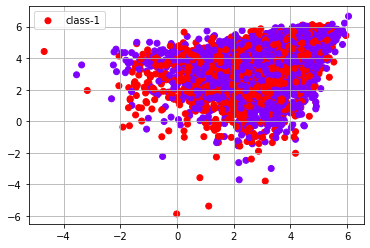

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="rainbow")
plt.grid()
plt.legend(["class-1", "class-2"])
plt.show()